# Setup

Importation des modules nécessaires à la réalisation du Notebook. J'ai dû créer un nouvel environnement virtuel sous Python 3.5 vu que Keras n'est pas pris en charge par la dernière version de Python.

In [8]:
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

Importation de TenserFlow et Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.1.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

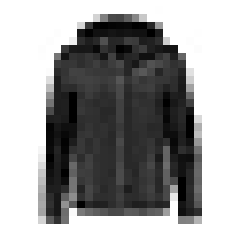

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

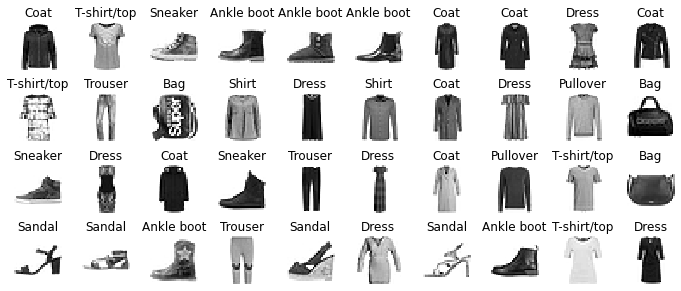

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
keras.backend.clear_session()
np.random.seed(42)

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer(hidden1.name) is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[ 0.07219879, -0.0056218 , -0.07075714, ...,  0.0554882 ,
         0.05474485,  0.04414514],
       [-0.06216688,  0.04438352, -0.0143625 , ...,  0.01229043,
         0.06521963,  0.00763559],
       [-0.04695994, -0.00469483, -0.01465943, ..., -0.02406379,
         0.06543149, -0.05986503],
       ...,
       [ 0.06627695,  0.01874816,  0.04491352, ..., -0.06754985,
         0.04425526, -0.04941757],
       [ 0.07030755,  0.00535956, -0.0329221 , ..., -0.0093566 ,
        -0.0714071 , -0.06420936],
       [-0.03692379, -0.01417703,  0.05854438, ...,  0.00756101,
         0.00894978, -0.06229187]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [29]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 98us/sample - loss: 0.7287 - accuracy: 0.7642 - val_loss: 0.5054 - val_accuracy: 0.8290
Epoch 2/30
55000/55000 [==============================] - 5s 82us/sample - loss: 0.4895 - accuracy: 0.8287 - val_loss: 0.4514 - val_accuracy: 0.8438
Epoch 3/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4429 - accuracy: 0.8443 - val_loss: 0.4107 - val_accuracy: 0.8592
Epoch 4/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.4159 - accuracy: 0.8540 - val_loss: 0.3914 - val_accuracy: 0.8662
Epoch 5/30
55000/55000 [==============================] - 5s 82us/sample - loss: 0.3953 - accuracy: 0.8605 - val_loss: 0.3863 - val_accuracy: 0.8724
Epoch 6/30
55000/55000 [==============================] - 4s 82us/sample - loss: 0.3798 - accuracy: 0.8663 - val_loss: 0.3780 - val_accuracy: 0.8640
Epoch 7/30
55000/55000 [==============================] -

In [30]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [31]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

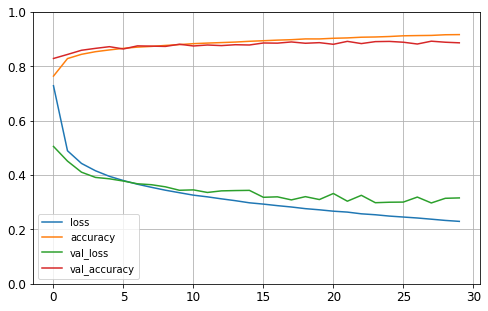

In [33]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.3408 - accuracy: 0.8801


[0.34080320533514025, 0.8801]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

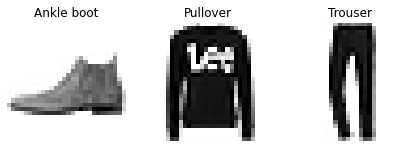

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Exercice
## 1) Plot Learning curves when using different optimizers

In [ ]:
Using Adam optimizer 


In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 141us/sample - loss: 0.3752 - accuracy: 0.8624 - val_loss: 0.3957 - val_accuracy: 0.8550
Epoch 2/30
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3296 - accuracy: 0.8781 - val_loss: 0.3172 - val_accuracy: 0.8846
Epoch 3/30
55000/55000 [==============================] - 7s 136us/sample - loss: 0.3095 - accuracy: 0.8845 - val_loss: 0.3473 - val_accuracy: 0.8764
Epoch 4/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.2901 - accuracy: 0.8912 - val_loss: 0.3157 - val_accuracy: 0.8816
Epoch 5/30
55000/55000 [==============================] - 7s 123us/sample - loss: 0.2760 - accuracy: 0.8978 - val_loss: 0.3008 - val_accuracy: 0.8900
Epoch 6/30
55000/55000 [==============================] - 7s 121us/sample - loss: 0.2606 - accuracy: 0.9025 - val_loss: 0.3165 - val_accuracy: 0.8790
Epoch 7/30
55000/55000 [===========================

In [42]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [43]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot learning curves


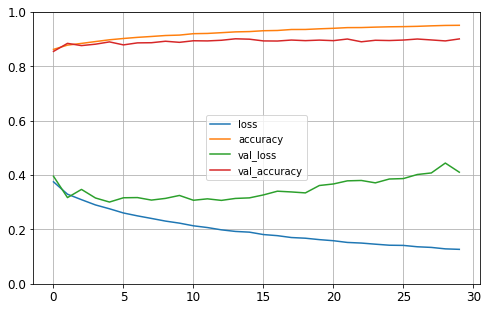

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.4371 - accuracy: 0.8936


[0.4370580168934539, 0.8936]

In [47]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [49]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [50]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 2) Plot Learning curves when using different batch size

In [52]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [54]:
history = model.fit(X_train, y_train, batch_size=20, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 119us/sample - loss: 0.0655 - accuracy: 0.9756 - val_loss: 0.4555 - val_accuracy: 0.9030
Epoch 2/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.0646 - accuracy: 0.9762 - val_loss: 0.4511 - val_accuracy: 0.9052
Epoch 3/30
55000/55000 [==============================] - 8s 154us/sample - loss: 0.0636 - accuracy: 0.9763 - val_loss: 0.4603 - val_accuracy: 0.9052
Epoch 4/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.0625 - accuracy: 0.9769 - val_loss: 0.4647 - val_accuracy: 0.9022
Epoch 5/30
55000/55000 [==============================] - 9s 171us/sample - loss: 0.0621 - accuracy: 0.9770 - val_loss: 0.4609 - val_accuracy: 0.9026
Epoch 6/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.0611 - accuracy: 0.9781 - val_loss: 0.4651 - val_accuracy: 0.9052
Epoch 7/30
55000/55000 [===========================

In [55]:
history.params

{'batch_size': 20,
 'epochs': 30,
 'steps': 2750,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [56]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot learning curve

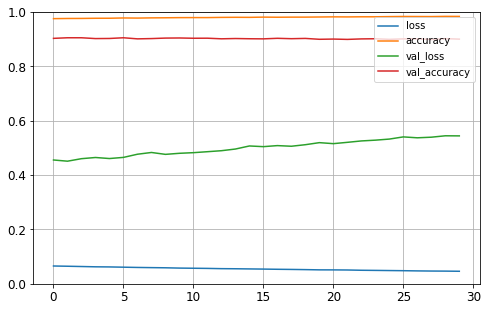

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 3) Plot Learning curves when using different number of epochs

In [59]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 97us/sample - loss: 0.0439 - accuracy: 0.9850 - val_loss: 0.5509 - val_accuracy: 0.9002
Epoch 2/20
55000/55000 [==============================] - 5s 89us/sample - loss: 0.0431 - accuracy: 0.9855 - val_loss: 0.5505 - val_accuracy: 0.9024
Epoch 3/20
55000/55000 [==============================] - 5s 85us/sample - loss: 0.0431 - accuracy: 0.9856 - val_loss: 0.5493 - val_accuracy: 0.9010
Epoch 4/20
55000/55000 [==============================] - 5s 86us/sample - loss: 0.0429 - accuracy: 0.9855 - val_loss: 0.5551 - val_accuracy: 0.9002
Epoch 5/20
55000/55000 [==============================] - 5s 92us/sample - loss: 0.0424 - accuracy: 0.9857 - val_loss: 0.5557 - val_accuracy: 0.9024
Epoch 6/20
55000/55000 [==============================] - 5s 88us/sample - loss: 0.0421 - accuracy: 0.9857 - val_loss: 0.5611 - val_accuracy: 0.8992
Epoch 7/20
55000/55000 [==============================] -

In [60]:
history.params

{'batch_size': 32,
 'epochs': 20,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [61]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [62]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot learning curve

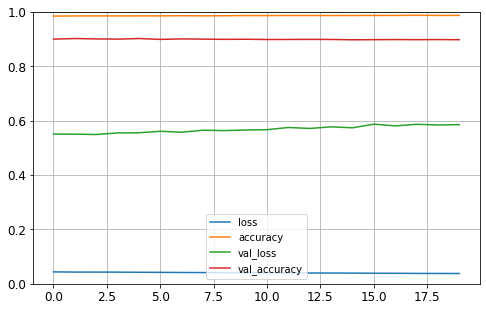

In [63]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 4) repeat with more layers

### Constructing a new model with more layers

In [64]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))
model2.add(keras.layers.Dense(10, activation="softmax"))


In [65]:
keras.backend.clear_session()
np.random.seed(42)

In [66]:
model2.layers

In [68]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 266,720
Trainable params: 266,720
Non-trainable params: 0
_________________________________________________________________


In [69]:
hidden1 = model2.layers[1]
hidden1.name

'dense'

In [70]:
model2.get_layer(hidden1.name) is hidden1

True

In [71]:
weights, biases = hidden1.get_weights()

In [72]:
weights

array([[-0.06797289,  0.05778925, -0.05329471, ...,  0.00865234,
         0.04485217,  0.0402998 ],
       [ 0.01425018, -0.04960448, -0.00026862, ..., -0.07185934,
         0.01686675, -0.02058912],
       [ 0.07207187, -0.00787614,  0.07101625, ...,  0.04622559,
        -0.00242995,  0.05189571],
       ...,
       [ 0.01946006,  0.03960086, -0.06361563, ..., -0.03625681,
        -0.02136099,  0.03359014],
       [ 0.00975082, -0.0576326 , -0.02311207, ..., -0.0242549 ,
        -0.03876619, -0.0464918 ],
       [ 0.02871929, -0.07408004,  0.05898395, ...,  0.04573119,
         0.01078376, -0.04767846]], dtype=float32)

In [73]:
weights.shape

(784, 300)

In [74]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [75]:
biases.shape

(300,)

### Compiling the model 

In [76]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training the model

In [79]:
history = model2.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 113us/sample - loss: 2.0785 - accuracy: 0.3336 - val_loss: 1.8574 - val_accuracy: 0.3940
Epoch 2/30
55000/55000 [==============================] - 6s 111us/sample - loss: 1.7206 - accuracy: 0.3972 - val_loss: 1.6014 - val_accuracy: 0.4194
Epoch 3/30
55000/55000 [==============================] - 6s 110us/sample - loss: 1.5039 - accuracy: 0.4533 - val_loss: 1.4179 - val_accuracy: 0.4808
Epoch 4/30
55000/55000 [==============================] - 6s 107us/sample - loss: 1.3377 - accuracy: 0.4814 - val_loss: 1.2679 - val_accuracy: 0.5232
Epoch 5/30
55000/55000 [==============================] - 5s 96us/sample - loss: 1.2320 - accuracy: 0.4964 - val_loss: 1.1811 - val_accuracy: 0.5112
Epoch 6/30
55000/55000 [==============================] - 4s 80us/sample - loss: 1.1651 - accuracy: 0.5067 - val_loss: 1.1500 - val_accuracy: 0.5136
Epoch 7/30
55000/55000 [=============================

In [80]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [81]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [82]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

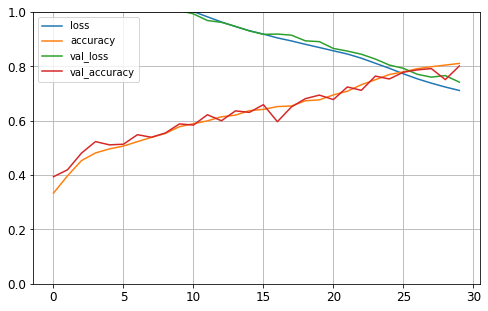

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [84]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.6643 - accuracy: 0.8962


[0.6643491710134025, 0.8962]

In [85]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [86]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [87]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [88]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

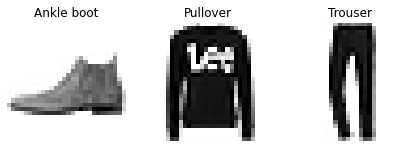

In [89]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 5) apply on different datasets